In [1]:
import csv
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
# Importamos utilidades y modelos de sklearn
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Se levanta el set de train generado

In [2]:
data_set = pd.read_csv("train_set.csv")
X = data_set.loc[:, data_set.columns != 'precio']
y = data_set.loc[:, ['precio']]

In [3]:
data_set.columns

Index(['Unnamed: 0', 'id', 'precio', 'usosmultiples', 'piscina',
       'escuelascercanas', 'centroscomercialescercanos', 'antiguedad',
       'metrostotales', 'metroscubiertos', 'tipodepropiedad_1',
       'tipodepropiedad_2', 'tipodepropiedad_3', 'tipodepropiedad_4',
       'tipodepropiedad_5', 'tipodepropiedad_6', 'tipodepropiedad_7',
       'tipodepropiedad_8', 'tipodepropiedad_9', 'tipodepropiedad_10',
       'tipodepropiedad_11', 'tipodepropiedad_12', 'tipodepropiedad_13',
       'tipodepropiedad_14', 'tipodepropiedad_15', 'tipodepropiedad_16',
       'tipodepropiedad_17', 'tipodepropiedad_18', 'tipodepropiedad_19',
       'tipodepropiedad_20', 'tipodepropiedad_21', 'tipodepropiedad_22',
       'tipodepropiedad_23', 'tipodepropiedad_24', 'provincia_1',
       'provincia_2', 'provincia_3', 'provincia_4', 'provincia_5',
       'provincia_6', 'provincia_7', 'provincia_8', 'provincia_9',
       'provincia_10', 'provincia_11', 'provincia_12', 'provincia_13',
       'provincia_14', 'pr

# Se separa en train y en test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [5]:
len(X_train)

179965

In [6]:
len(X_test)

59989

# Se define y entrena el modelo con el set de train 

In [7]:
model_RF = RandomForestRegressor(n_estimators = 30, max_depth = 9, min_samples_split = 2 ,max_features = "auto")
model_RF.fit(X_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Encontrado max_depth = 9. A partir de ahi el modelo comienza a overfittear

Min_sample_split pareciese que no cambia nada por ahora. Lo dejo en default (=2) por ahora

### Aca tambien deberia hacerse la busqueda de hiperparametros (creo...)

# Se calcula la prediccion del set de test y del set de entrenamiento tambien

In [8]:
pred_train = model_RF.predict(X_train)

In [9]:
pred_test = model_RF.predict(X_test)

# Se evaluan ambas predicciones

## Como metrica se utiliza RMSLE

In [10]:
rmsle_train = np.sqrt(sklearn.metrics.mean_squared_log_error(y_train, pred_train))
rmsle_test = np.sqrt(sklearn.metrics.mean_squared_log_error(y_test, pred_test))
print(f"RMSLE train: {rmsle_train:.5f}")
print(f"RMSLE test: {rmsle_test:.5f}")

RMSLE train: 0.52339
RMSLE test: 0.53524


Hay que tocar los hiperparametros de Random Forests.

Mmmmm... Manso overfittin ahi...

# Se genera el archivo a subir a Kaggle

In [11]:
test_csv = pd.read_csv("test.csv")

In [12]:
test_csv.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos
0,4941,"casa en venta en miguel hidalgo, distrito federal",<p>excelente casa estilo moderno.</p>,Casa,Bosque de Cedros,Miguel Hidalgo,Distrito Federal,29.0,3.0,NaN,...,NaN,NaN,19.408668,-99.246767,2013-07-20 00:00:00,0.0,0.0,0.0,0.0,0.0
1,51775,departamentos en venta en montebello,<p>departamento una recamara:\n</p><p>departam...,Apartamento,NaN,Mérida,Yucatán,NaN,1.0,1.0,...,67.0,113851.0,21.032480,-89.592424,2015-10-24 00:00:00,0.0,0.0,0.0,0.0,0.0
2,115253,departamento nuevo delegación coyoacán de 87 m...,"departamento nuevo de 87.06 m2, 1 cajón de est...",Apartamento,"Pueblo de los Reyes, Coyoacán, Mexico D.F.",Coyoacán,Distrito Federal,0.0,2.0,1.0,...,100.0,23620.0,19.332829,-99.152913,2015-05-30 00:00:00,0.0,0.0,0.0,0.0,1.0
3,299321,departamento en venta en acapulco,<p> raíces dv001 precioso departamento tipo k...,Apartamento,NaN,Acapulco de Juárez,Guerrero,2.0,2.0,2.0,...,86.0,129347.0,16.860487,-99.878383,2015-04-02 00:00:00,0.0,0.0,0.0,0.0,0.0
4,173570,bonita casa sola equipada de dos niveles en lo...,"<p>casa sola, bonita de dos rec&aacute;maras u...",Casa,CEDROS,Tultitlán,Edo. de México,10.0,2.0,1.0,...,76.0,57125.0,19.640482,-99.127273,2013-08-15 00:00:00,0.0,0.0,0.0,1.0,1.0


In [13]:
test_csv.isnull().sum().sum()

132844

In [14]:
test_csv.isnull().sum()

id                                0
titulo                         1378
descripcion                     401
tipodepropiedad                   7
direccion                     13191
ciudad                           83
provincia                        42
antiguedad                    10714
habitaciones                   5628
garages                        9323
banos                          6554
metroscubiertos                4299
metrostotales                 12655
idzona                         7179
lat                           30695
lng                           30695
fecha                             0
gimnasio                          0
usosmultiples                     0
piscina                           0
escuelascercanas                  0
centroscomercialescercanos        0
dtype: int64

Tengo problemas de que hay muchos NULLs en el set de test. Si yo estoy eliminando los NULLs para calcular features y entrenar... Como hago para calcular features del set de test y realizar la prediccion? Porque tengo que devolver prediccion de todos los ids no?

# Importancia de features

In [18]:
model_RF.feature_importances_

array([7.18500238e-02, 6.73009998e-03, 4.72915165e-03, 1.69627874e-03,
       6.08182142e-04, 4.24621310e-03, 1.68999652e-02, 7.33820019e-02,
       6.36985375e-01, 3.31113146e-04, 2.98418935e-04, 3.69342176e-04,
       3.37984310e-04, 2.13594832e-04, 0.00000000e+00, 1.94916274e-05,
       8.32190901e-05, 0.00000000e+00, 1.25420894e-04, 3.02006168e-04,
       1.07970858e-04, 0.00000000e+00, 8.05868222e-06, 1.27865600e-04,
       0.00000000e+00, 4.27123041e-05, 8.66718717e-05, 2.49857503e-04,
       9.35377924e-05, 1.93767920e-05, 4.06509442e-05, 0.00000000e+00,
       0.00000000e+00, 2.67782105e-04, 2.76389584e-04, 8.27909268e-05,
       1.31107073e-04, 1.29176027e-04, 3.08115470e-04, 4.32028793e-04,
       1.17328556e-04, 3.88387235e-04, 1.94385700e-04, 5.61593376e-04,
       2.43368881e-04, 2.42943647e-04, 2.21394376e-04, 4.47507338e-04,
       1.29247552e-04, 2.78077905e-04, 2.31876263e-04, 4.46031195e-04,
       1.27556643e-04, 2.09813979e-04, 3.53161190e-04, 1.48347690e-04,
      

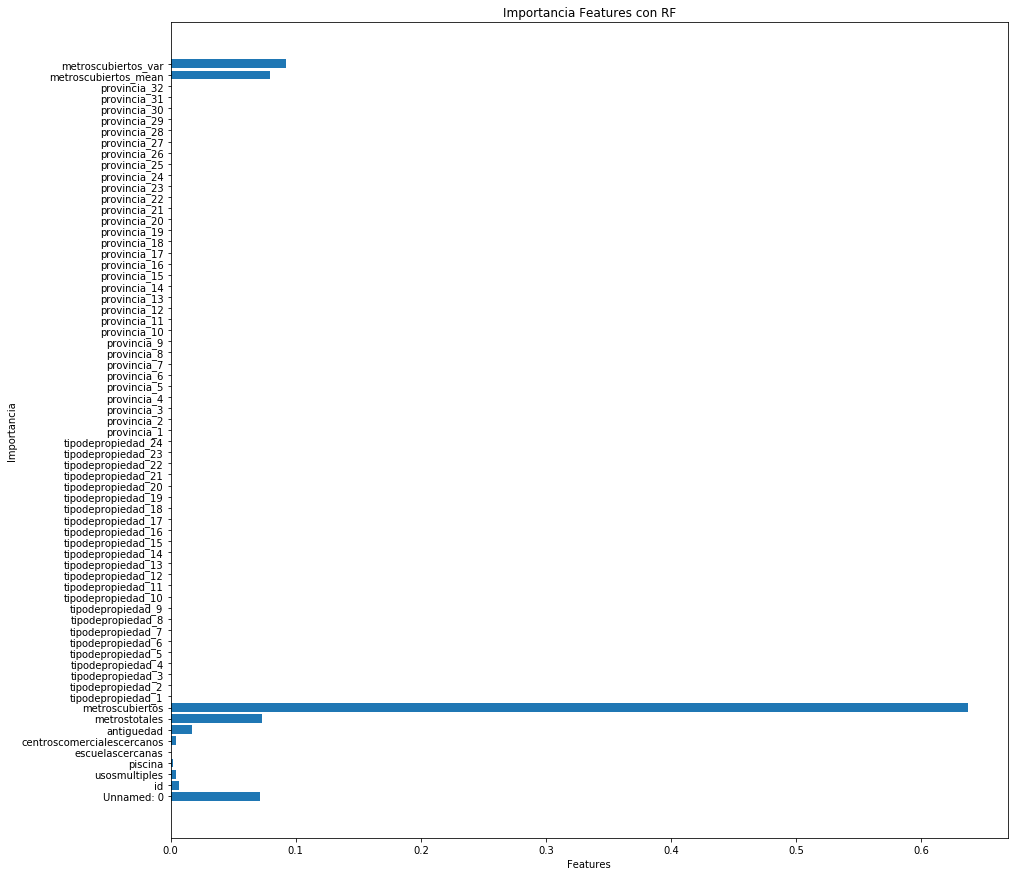

In [27]:
plt.figure(figsize = (15,15))
plt.barh(X_train.columns, model_RF.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.show()

Metroscubiertos es lo unico que me importa para calcular el precio... Lo de mas casi que no es relevante.